In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate, cross_val_score

import statsmodels.api as sm

pd.set_option("max_rows",999)

In [2]:
df = pd.read_csv("mpg_train.csv")

In [3]:
df.head(298)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,6,258.0,110.0,2962,13.5,71,amc hornet sportabout (sw)
1,34.0,4,108.0,70.0,2245,16.9,82,toyota corolla
2,18.2,8,318.0,135.0,3830,15.2,79,dodge st. regis
3,32.3,4,97.0,67.0,2065,17.8,81,subaru
4,14.0,8,400.0,175.0,4385,12.0,72,pontiac catalina
5,13.0,8,400.0,175.0,5140,12.0,71,pontiac safari (sw)
6,25.0,4,97.5,80.0,2126,17.0,72,dodge colt hardtop
7,16.0,8,318.0,150.0,4190,13.0,76,dodge coronet brougham
8,23.0,4,120.0,88.0,2957,17.0,75,peugeot 504
9,32.9,4,119.0,100.0,2615,14.8,81,datsun 200sx


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
mpg             298 non-null float64
cylinders       298 non-null int64
displacement    298 non-null float64
horsepower      293 non-null float64
weight          298 non-null int64
acceleration    298 non-null float64
model_year      298 non-null int64
car_name        298 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 18.8+ KB


In [5]:
df['acceleration'].median()

15.5

In [6]:
df['model_year'].value_counts()

73    34
76    26
78    25
80    23
75    23
82    22
72    22
70    22
81    21
79    21
74    21
71    20
77    18
Name: model_year, dtype: int64

In [7]:
df['displacement'].min()

70.0

In [8]:
df1 = df.cylinders >= 8

In [9]:
df1.value_counts()

False    228
True      70
Name: cylinders, dtype: int64

In [10]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.shape

(293, 8)

In [13]:
df['car_name'].unique()

array(['amc hornet sportabout (sw)', 'toyota corolla', 'dodge st. regis',
       'subaru', 'pontiac catalina', 'pontiac safari (sw)',
       'dodge colt hardtop', 'dodge coronet brougham', 'peugeot 504',
       'datsun 200sx', 'saab 99e', 'toyota corolla tercel',
       'chevrolet chevelle malibu classic', 'chevrolet nova custom',
       'datsun b210 gx', 'opel manta', 'mercury capri 2000',
       'dodge aries wagon (sw)', 'datsun pl510', 'plymouth arrow gs',
       'datsun 710', 'ford maverick', 'plymouth volare premier v8',
       'mercury capri v6', 'ford granada gl', 'fiat 124b',
       'ford fairmont (auto)', 'buick century', 'amc gremlin',
       'ford galaxie 500', 'hi 1200d', 'plymouth volare custom',
       'chevrolet vega', 'audi fox', 'mazda rx2 coupe', 'amc matador',
       'ford escort 4w', 'ford gran torino', 'pontiac astro',
       'peugeot 604sl', 'toyota mark ii', 'ford pinto runabout',
       'amc pacer d/l', 'ford pinto', 'peugeot 504 (sw)',
       'toyota celica gt 

In [14]:
df2 = df.drop(labels='car_name',axis=1)

In [15]:
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,6,258.0,110.0,2962,13.5,71
1,34.0,4,108.0,70.0,2245,16.9,82
2,18.2,8,318.0,135.0,3830,15.2,79
3,32.3,4,97.0,67.0,2065,17.8,81
4,14.0,8,400.0,175.0,4385,12.0,72
5,13.0,8,400.0,175.0,5140,12.0,71
6,25.0,4,97.5,80.0,2126,17.0,72
7,16.0,8,318.0,150.0,4190,13.0,76
8,23.0,4,120.0,88.0,2957,17.0,75
9,32.9,4,119.0,100.0,2615,14.8,81


In [16]:
X = df2.iloc[:,1:]
y = df2.iloc[:,0]

In [17]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,6,258.0,110.0,2962,13.5,71
1,4,108.0,70.0,2245,16.9,82
2,8,318.0,135.0,3830,15.2,79
3,4,97.0,67.0,2065,17.8,81
4,8,400.0,175.0,4385,12.0,72
5,8,400.0,175.0,5140,12.0,71
6,4,97.5,80.0,2126,17.0,72
7,8,318.0,150.0,4190,13.0,76
8,4,120.0,88.0,2957,17.0,75
9,4,119.0,100.0,2615,14.8,81


In [18]:
y

0      18.0
1      34.0
2      18.2
3      32.3
4      14.0
5      13.0
6      25.0
7      16.0
8      23.0
9      32.9
10     25.0
11     38.1
12     16.0
13     16.0
14     39.4
15     24.0
16     23.0
17     25.8
18     27.0
19     25.5
20     32.0
21     15.0
22     13.0
24     21.0
25     20.2
26     30.0
27     20.2
28     17.0
29     17.5
30     20.0
31     15.0
32      9.0
33     27.2
34     19.0
35     21.0
36     29.0
37     19.0
38     15.5
39     25.0
40     34.4
41     14.0
42     23.0
43     16.2
44     20.0
45     21.0
46     18.0
47     19.0
48     17.5
49     18.0
50     21.0
52     21.1
53     26.6
54     26.6
55     16.0
56     13.0
57     18.5
58     28.1
59     23.9
60     19.0
61     43.1
62     29.0
63     37.0
64     30.0
65     30.5
66     15.0
67     20.5
68     14.0
69     16.5
71     13.0
72     16.9
73     28.0
74     18.1
75     22.0
76     22.5
77     19.9
78     24.0
79     28.0
80     19.0
81     18.0
82     15.0
84     17.5
85     27.2
86     15.0
87  

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
lr = LinearRegression(normalize=True)

In [21]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [22]:
lr.predict(X_test)

array([22.10388183, 23.46184755, 17.00787649, 24.15638768, 28.53476792,
       26.06325673, 10.43094022, 30.21096798, 30.1999619 , 26.00079916,
       12.94743589, 35.27609156, 20.40183253, 28.89615895, 22.45098688,
       25.72870698, 23.08842546,  5.06137637, 26.02668821, 33.51512169,
       22.26597681, 23.1977532 , 16.23016927, 26.55203444, 25.08072038,
       11.38475012, 23.08332815, 19.12183933, 31.40827145, 20.86203664,
       23.26218474, 26.95973333, 31.27307178, 30.74020186, 32.07937239,
       28.26321414, 29.8972309 , 15.57095154, 26.73549117, 29.13250645,
       23.67541896, 12.90386473, 32.26571213, 10.6871767 , 32.03533639,
        8.83500323, 16.98602011, 27.10814393, 19.34189504, 11.18393404,
       35.43001665, 11.7366563 , 29.6739374 , 28.9180807 , 20.37504805,
       20.79552808,  7.91205601, 28.92843205, 25.86421276])

In [23]:
lr.predict(X_test).mean()

23.208827514198394

In [24]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.747994,-0.776903,-0.754243,-0.802575,0.391580,0.571894
cylinders,-0.747994,1.000000,0.946978,0.826626,0.891505,-0.466157,-0.300899
displacement,-0.776903,0.946978,1.000000,0.879306,0.927491,-0.504143,-0.326121
horsepower,-0.754243,0.826626,0.879306,1.000000,0.852096,-0.671806,-0.394226
weight,-0.802575,0.891505,0.927491,0.852096,1.000000,-0.376687,-0.277205
acceleration,0.391580,-0.466157,-0.504143,-0.671806,-0.376687,1.000000,0.254625
model_year,0.571894,-0.300899,-0.326121,-0.394226,-0.277205,0.254625,1.000000


In [25]:
df3 = df2[['mpg','weight']]

In [26]:
df3

,mpg,weight
0,18.0,2962
1,34.0,2245
2,18.2,3830
3,32.3,2065
4,14.0,4385
5,13.0,5140
6,25.0,2126
7,16.0,4190
8,23.0,2957
9,32.9,2615


In [27]:
X = df3['weight'].values
y = df3['mpg'].values

In [28]:
lr2 = LinearRegression()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
lr2.fit(X_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr2.coef_

array([-0.00750062])

In [32]:
test = pd.read_csv("mpg_test.csv")

In [33]:
test

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
0,18.0,8,307,130.0,3504,12.0,70,chevrolet chevelle malibu
1,17.0,8,302,140.0,3449,10.5,70,ford torino
2,14.0,8,454,220.0,4354,9.0,70,chevrolet impala
3,14.0,8,440,215.0,4312,8.5,70,plymouth fury iii
4,15.0,8,383,170.0,3563,10.0,70,dodge challenger se
5,22.0,6,198,95.0,2833,15.5,70,plymouth duster
6,21.0,6,200,85.0,2587,16.0,70,ford maverick
7,25.0,4,113,95.0,2228,14.0,71,toyota corona
8,25.0,4,98,NaN,2046,19.0,71,ford pinto
9,14.0,8,350,165.0,4209,12.0,71,chevrolet impala


In [34]:
test.dropna(inplace=True)

In [35]:
test.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
car_name        0
dtype: int64

In [36]:
test = test.drop(labels='car_name',axis=1)

In [37]:
test

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307,130.0,3504,12.0,70
1,17.0,8,302,140.0,3449,10.5,70
2,14.0,8,454,220.0,4354,9.0,70
3,14.0,8,440,215.0,4312,8.5,70
4,15.0,8,383,170.0,3563,10.0,70
5,22.0,6,198,95.0,2833,15.5,70
6,21.0,6,200,85.0,2587,16.0,70
7,25.0,4,113,95.0,2228,14.0,71
9,14.0,8,350,165.0,4209,12.0,71
10,14.0,8,400,175.0,4464,11.5,71


In [38]:
X = test.iloc[:,1:]
y = test.iloc[:,0]

In [39]:
X.shape, y.shape

((99, 6), (99,))

In [40]:
X.values, y.values

(array([[8.000e+00, 3.070e+02, 1.300e+02, 3.504e+03, 1.200e+01, 7.000e+01],
        [8.000e+00, 3.020e+02, 1.400e+02, 3.449e+03, 1.050e+01, 7.000e+01],
        [8.000e+00, 4.540e+02, 2.200e+02, 4.354e+03, 9.000e+00, 7.000e+01],
        [8.000e+00, 4.400e+02, 2.150e+02, 4.312e+03, 8.500e+00, 7.000e+01],
        [8.000e+00, 3.830e+02, 1.700e+02, 3.563e+03, 1.000e+01, 7.000e+01],
        [6.000e+00, 1.980e+02, 9.500e+01, 2.833e+03, 1.550e+01, 7.000e+01],
        [6.000e+00, 2.000e+02, 8.500e+01, 2.587e+03, 1.600e+01, 7.000e+01],
        [4.000e+00, 1.130e+02, 9.500e+01, 2.228e+03, 1.400e+01, 7.100e+01],
        [8.000e+00, 3.500e+02, 1.650e+02, 4.209e+03, 1.200e+01, 7.100e+01],
        [8.000e+00, 4.000e+02, 1.750e+02, 4.464e+03, 1.150e+01, 7.100e+01],
        [8.000e+00, 3.510e+02, 1.530e+02, 4.154e+03, 1.350e+01, 7.100e+01],
        [6.000e+00, 2.500e+02, 8.800e+01, 3.139e+03, 1.450e+01, 7.100e+01],
        [4.000e+00, 7.200e+01, 6.900e+01, 1.613e+03, 1.800e+01, 7.100e+01],
        [4.0

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
lr3 = LinearRegression()

In [43]:
lr3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
y_predict = lr3.predict(X_test)

In [45]:
y_predict

array([19.23694209, 22.02484414, 26.71763072, 24.09426684, 30.5645661 ,
       34.15929269, 31.24422716, 30.28186675, 12.27427903, 16.72583774,
       28.79557209, 32.88201243, 30.11695771, 28.15508217, 23.08503181,
       16.85244349, 10.12873593, 28.88446654, 31.41444579, 32.84182432])

In [46]:
r2_score(y_test,y_predict)

0.7786666923074768

In [47]:
test.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.866701,-0.885383,-0.846197,-0.912186,0.521521,0.603693
cylinders,-0.866701,1.000000,0.960278,0.886512,0.913293,-0.605865,-0.488514
displacement,-0.885383,0.960278,1.000000,0.943492,0.946278,-0.648873,-0.503526
horsepower,-0.846197,0.886512,0.943492,1.000000,0.896080,-0.738623,-0.488242
weight,-0.912186,0.913293,0.946278,0.896080,1.000000,-0.523069,-0.405389
acceleration,0.521521,-0.605865,-0.648873,-0.738623,-0.523069,1.000000,0.413759
model_year,0.603693,-0.488514,-0.503526,-0.488242,-0.405389,0.413759,1.000000


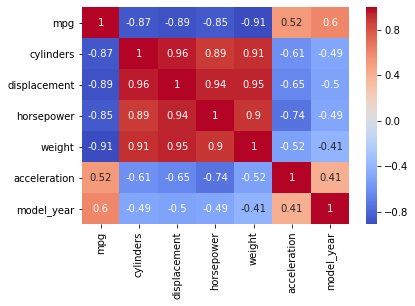

In [48]:
sns.heatmap(test.corr(),annot=True, cmap='coolwarm')
plt.show()

In [49]:
test2 =  test[['weight','acceleration','model_year','mpg']]

In [50]:
test2

,weight,acceleration,model_year,mpg
0,3504,12.0,70,18.0
1,3449,10.5,70,17.0
2,4354,9.0,70,14.0
3,4312,8.5,70,14.0
4,3563,10.0,70,15.0
5,2833,15.5,70,22.0
6,2587,16.0,70,21.0
7,2228,14.0,71,25.0
9,4209,12.0,71,14.0
10,4464,11.5,71,14.0


In [51]:
X = test2.iloc[:,0:3].values
y = test2.iloc[:,3].values

In [52]:
X.shape, y.shape

((99, 3), (99,))

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
lr4 = LinearRegression()

In [55]:
lr4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lr4.coef_

array([-0.00735827, -0.26741587,  0.66293554])

In [57]:
lr4.intercept_

-0.570064383368198

In [58]:
lr4_predict=lr4.predict(X_test)

In [59]:
r2_score(y_test,lr4_predict)

0.7994861274086194

In [60]:
test2

,weight,acceleration,model_year,mpg
0,3504,12.0,70,18.0
1,3449,10.5,70,17.0
2,4354,9.0,70,14.0
3,4312,8.5,70,14.0
4,3563,10.0,70,15.0
5,2833,15.5,70,22.0
6,2587,16.0,70,21.0
7,2228,14.0,71,25.0
9,4209,12.0,71,14.0
10,4464,11.5,71,14.0


In [61]:
X = test2.iloc[:,0:3].values
y = test2.iloc[:,3].values

In [62]:
X = sm.add_constant(X)

In [63]:
model = sm.OLS(y, X).fit()

In [64]:
predictions = model.predict(X) 

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     278.1
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           6.71e-47
Time:                        18:16:43   Log-Likelihood:                -236.21
No. Observations:                  99   AIC:                             480.4
Df Residuals:                      95   BIC:                             490.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9413      6.619     -0.293      0.770     -15.082      11.199
x1            -0.0072      0.000    -20.318      0.000      -0.008      -0.007
x2            -0.0537      0.120     -0.447      0.656      -0.292       0.185
x3             0.6352      0.083      7.650      0.000       0.470       0.800
==============================================================================
Omnibus:                        9.786   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.637
Skew:                           0.538   Prob(JB):                      0.00297
Kurtosis:                       4.290   Cond. No.                     7.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
tree = DecisionTreeRegressor(random_state=42,ccp_alpha=0.05)

In [67]:
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.05, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [68]:
y_predict = tree.predict(X_test)

In [69]:
y_predict

array([19.45555556, 19.45555556, 21.48333333, 25.        , 36.625     ,
       36.625     , 29.7       , 33.25      , 14.        , 17.5       ,
       27.75      , 36.625     , 30.5       , 27.75      , 21.48333333,
       17.5       , 11.        , 27.75      , 35.35      , 29.7       ])

In [70]:
y_predict = pd.DataFrame(y_predict)

In [71]:
y_predict

,0
0,19.455556
1,19.455556
2,21.483333
3,25.000000
4,36.625000
5,36.625000
6,29.700000
7,33.250000
8,14.000000
9,17.500000


In [72]:
r2_score(y_test,y_predict)

0.8227344545266845

In [73]:
cross_validate(estimator=tree,X=X_train,y=y_train, cv=10)

{'fit_time': array([0.        , 0.        , 0.01561666, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.01562238, 0.        ]),
 'score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'test_score': array([0.95932622, 0.83278923, 0.89259684, 0.42002357, 0.72356148,
        0.74449299, 0.61657486, 0.97824466, 0.95558417, 0.93796464])}